In [2]:
import os
import h5py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style("ATLAS")
#plt.style.use(hep.style.ATLAS)
plt.style.use([hep.style.ATLAS, {'axes.labelsize': 20}, {'axes.labelpad': 20}, {'axes.titlelocation': 'right'}, ])

cwd = os.getcwd()

In [3]:
data_path = "/home/saolivap/WorkArea/samples/DarkPhoton/hdf5/"

In [4]:
def load_VBF(data_file = data_path):
    VBF_file = os.path.join(data_file, "VBF_sgn_ntuple.h5")
    h5_VBF = pd.HDFStore(VBF_file)
    data_VBF = h5_VBF.get('Selection')
    data_VBF["Type"] = (["sgn" for i in range(len(data_VBF))])
    data_VBF["Type_val"] = np.array([1.0 for i in range(len(data_VBF))])
    return(data_VBF)

def load_QCD(data_file = data_path):
    QCD_file = os.path.join(data_file, "QCD_bkg_ntuple.h5")
    h5_QCD = pd.HDFStore(QCD_file)
    data_QCD = h5_QCD.get('Selection')
    data_QCD["Type"] = (["bkg" for i in range(len(data_QCD))])
    data_QCD["Type_val"] = np.array([0.0 for i in range(len(data_QCD))])
    return(data_QCD)

In [5]:
data_sgn = load_VBF()
data_bkg = load_QCD()

In [6]:
df = pd.concat([data_sgn,data_bkg],axis=0)

In [64]:
variables = ["jet1_pt", "jet1_eta", "jet1_phi", "jet2_pt", "jet1_e", "jet2_eta", "jet2_phi", "jet2_e",
             "nJets30", "mjj", "detajj", "signetajj", "dphijj", "dphi_j1met", "min_dphi_jetmet", 
             "nLJjets", "nLJjets20", 
             "LJjet1_pt", "LJjet1_eta", "LJjet1_phi", "LJjet1_m", "LJjet1_width", "LJjet1_EMfrac",
             "LJjet1_timing", "LJjet1_jvt", "LJjet1_gapRatio", "LJjet1_IsBIB", "LJjet1_DPJtagger"]
#variables = ["jet1_pt"]

/home/saolivap/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


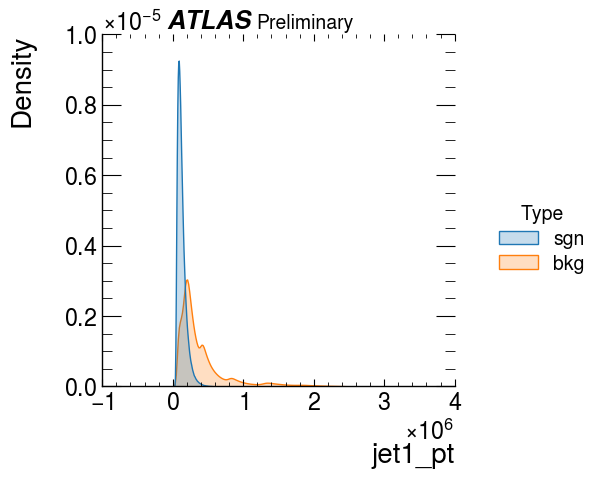

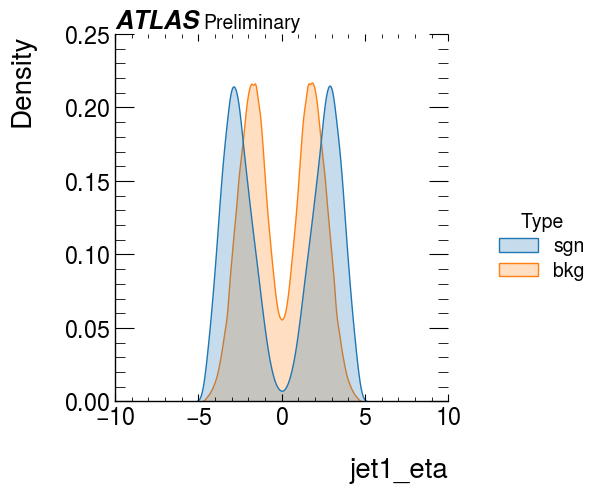

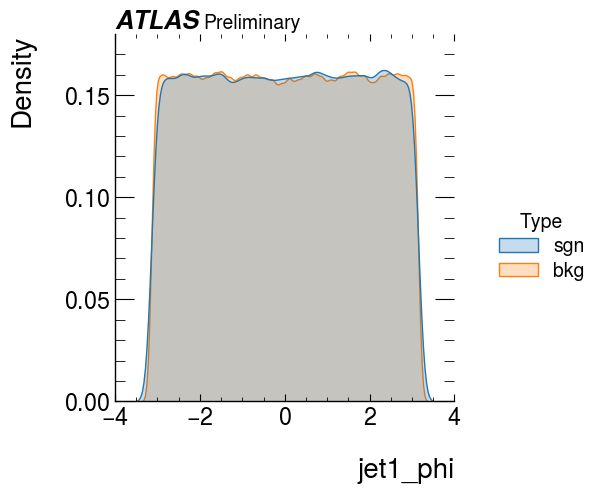

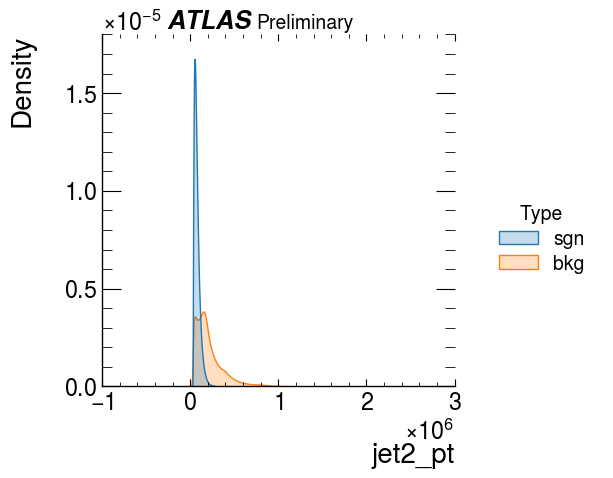

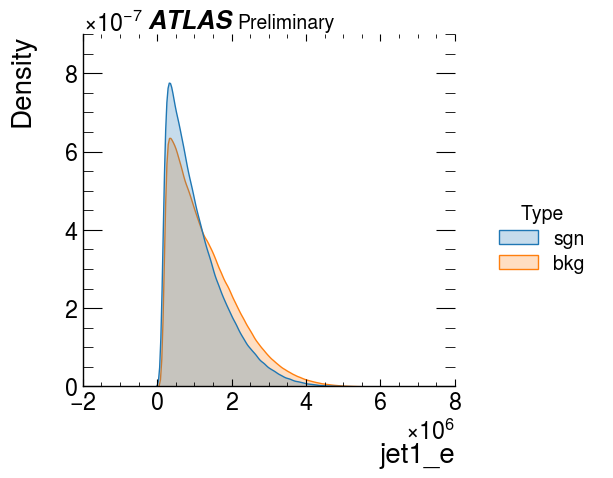

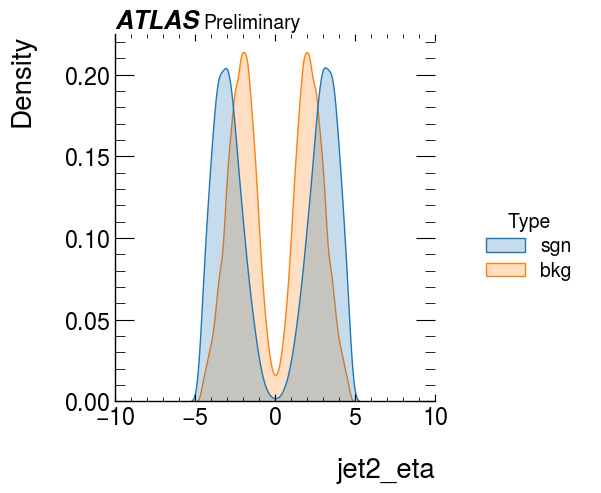

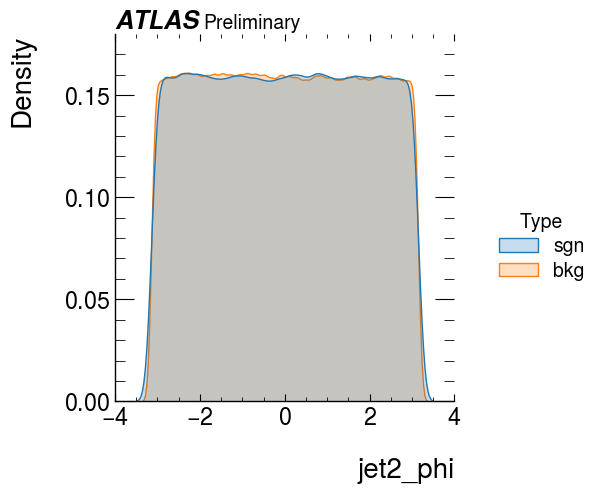

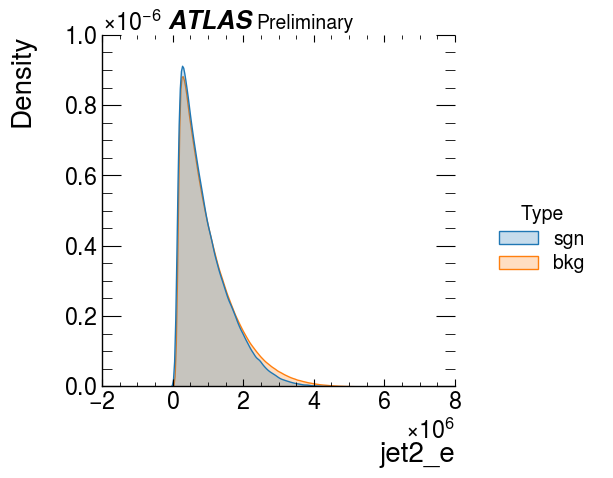

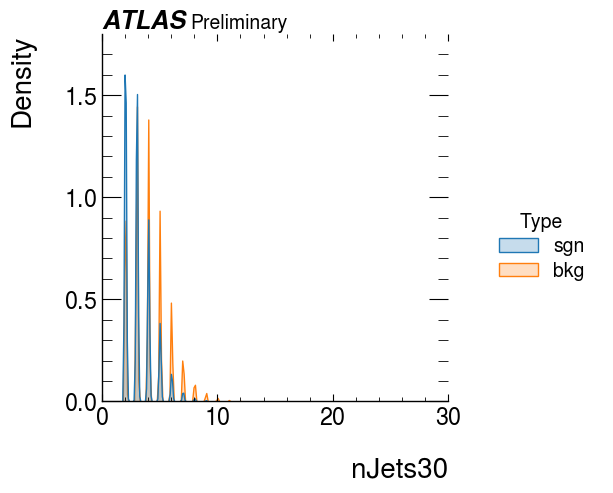

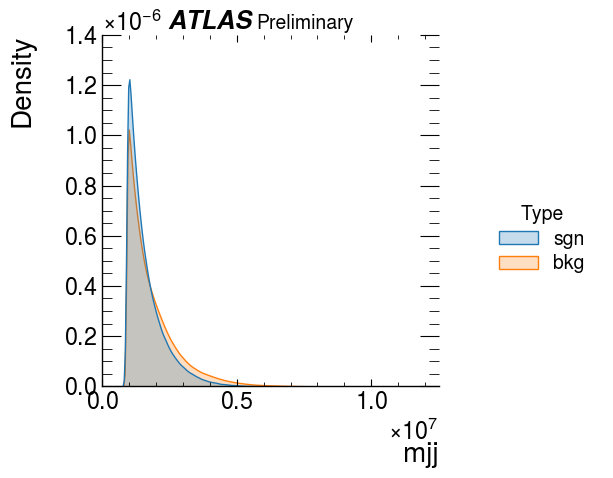

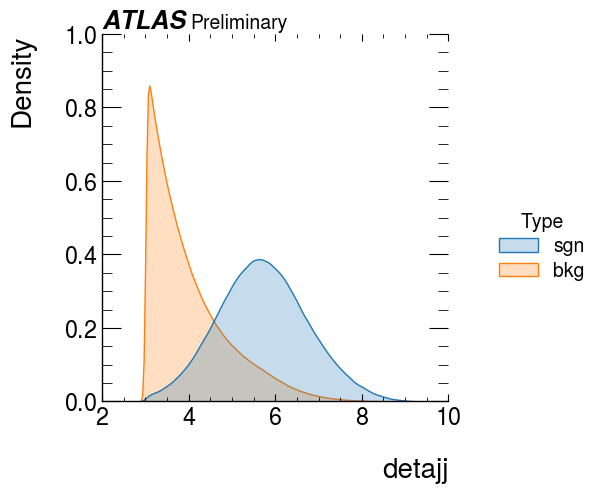

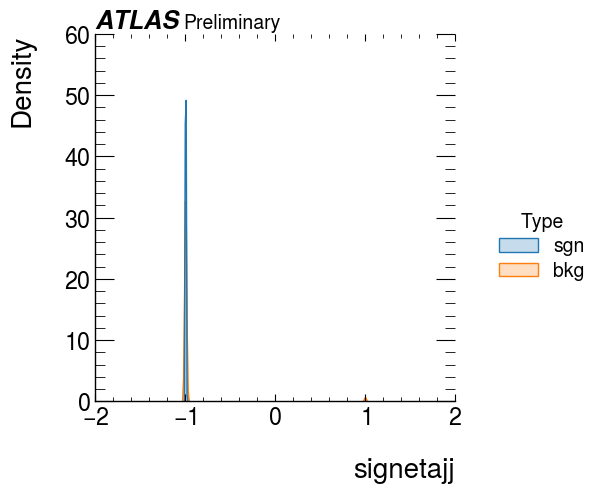

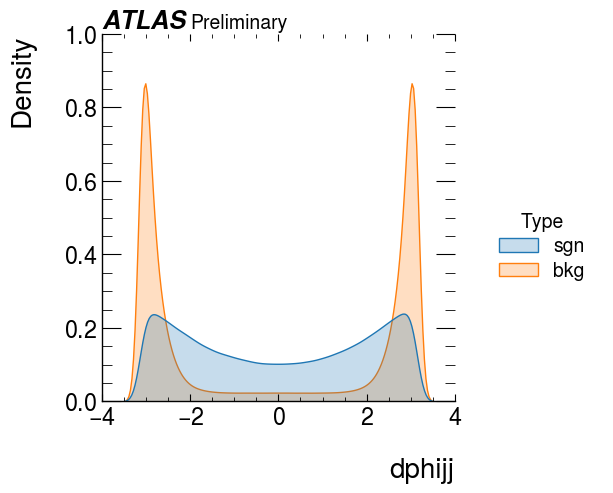

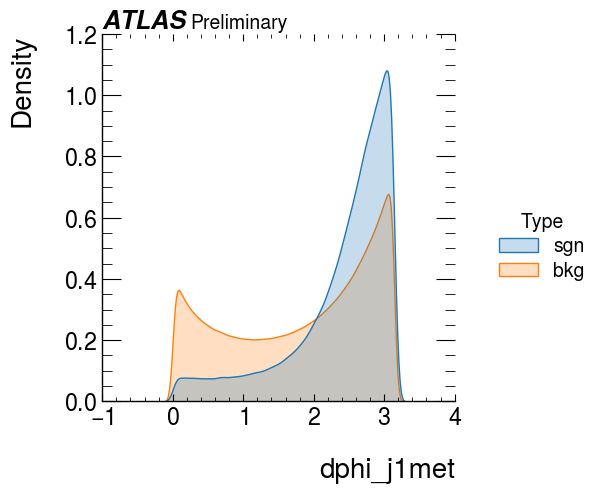

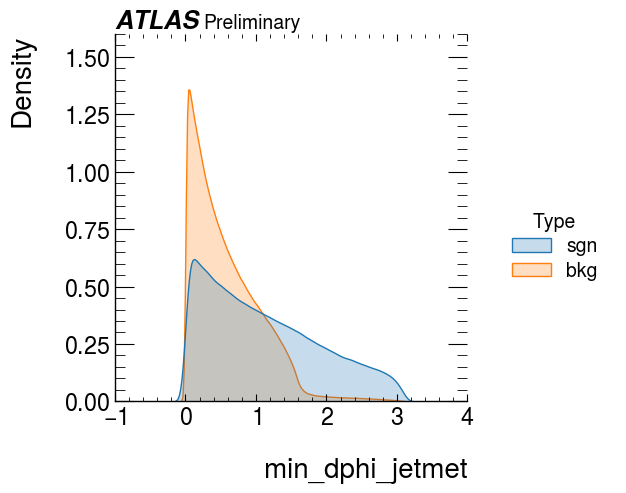

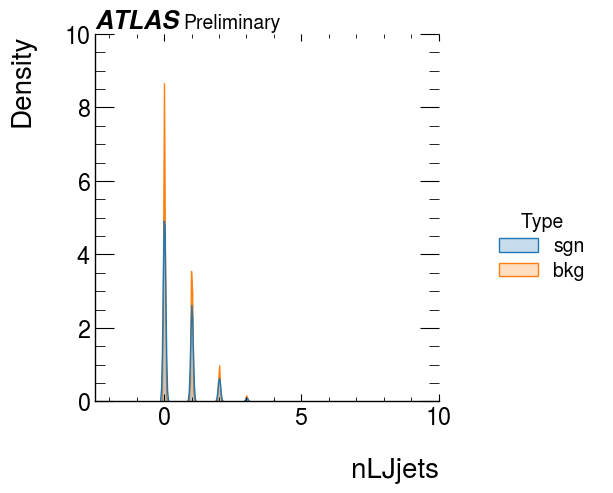

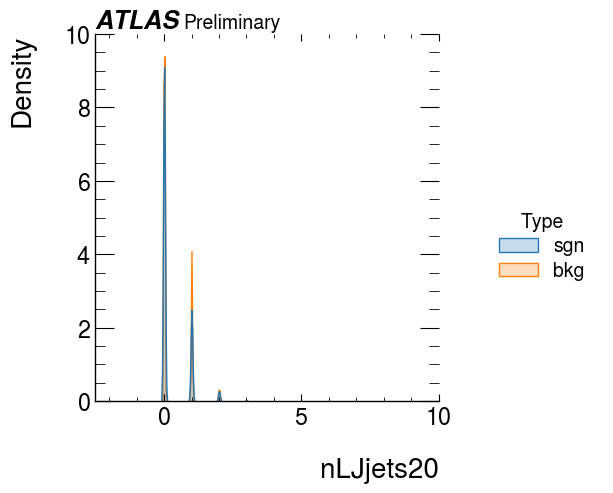

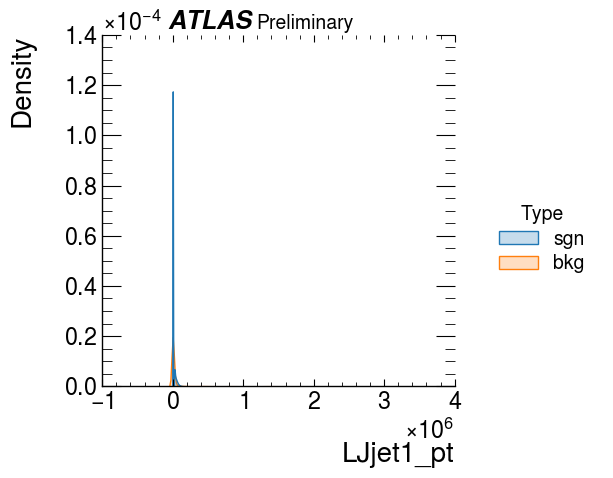

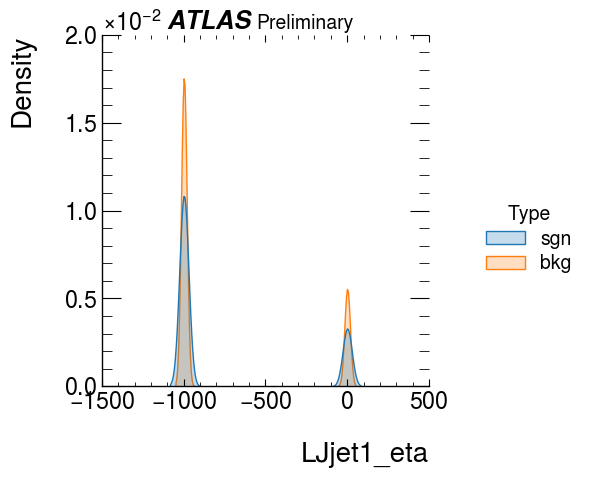

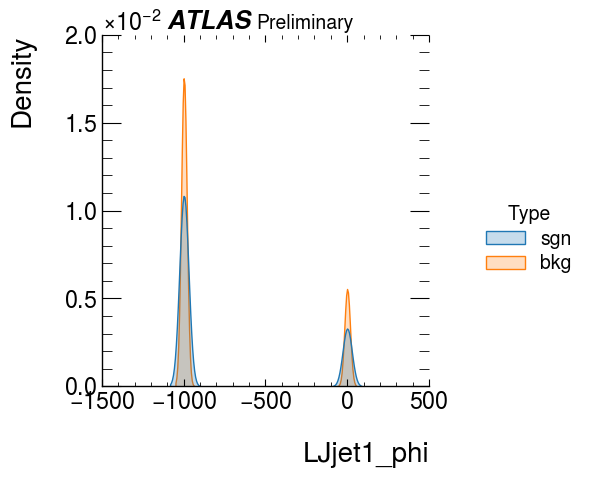

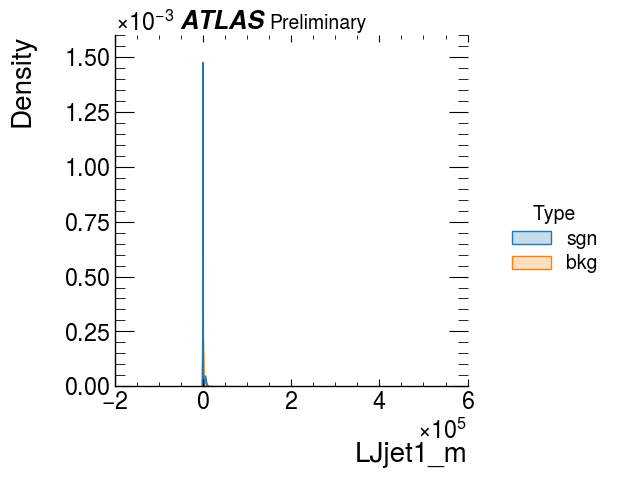

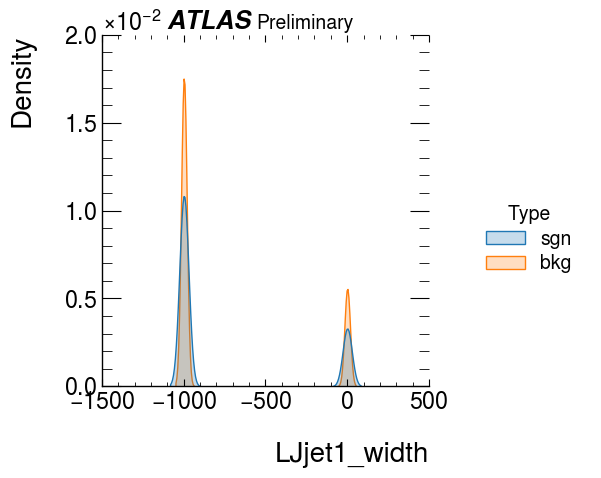

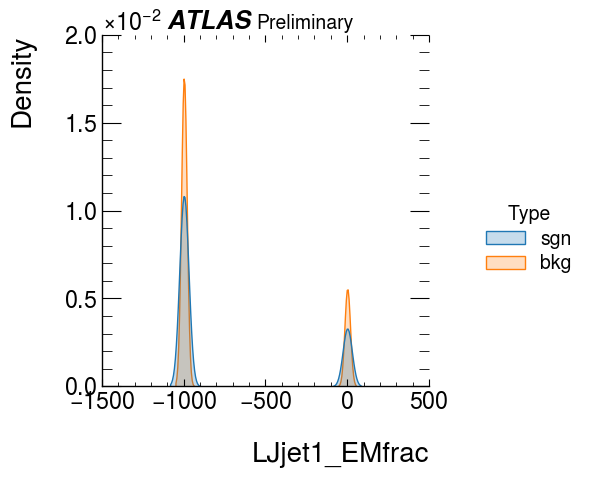

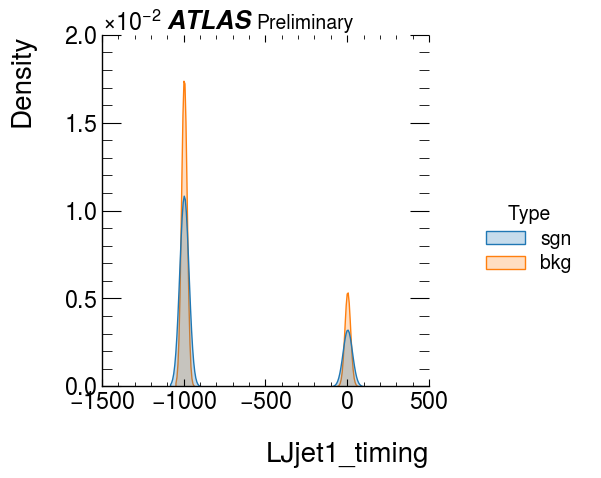

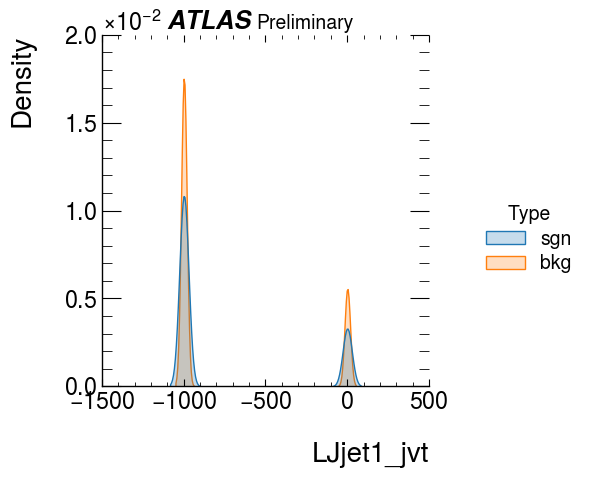

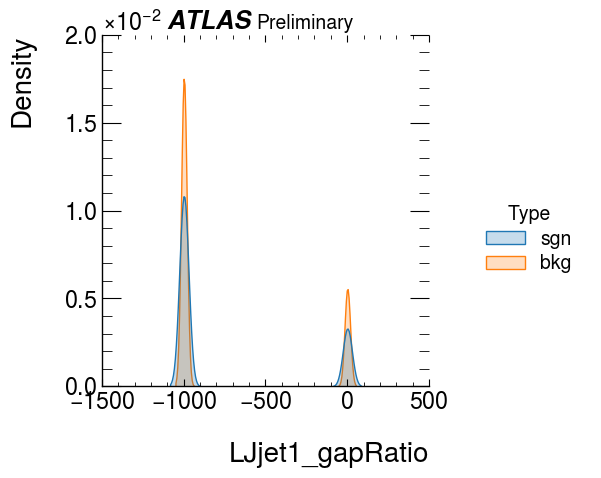

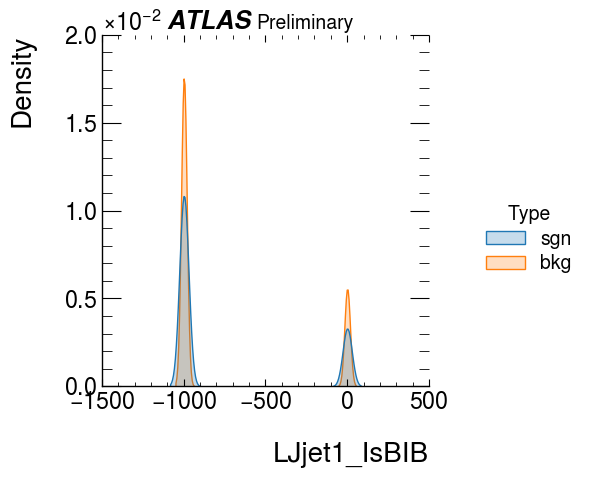

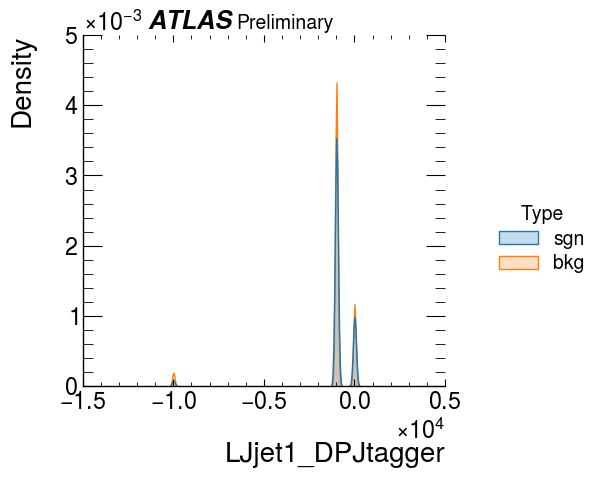

In [65]:
for var in variables:
    sns.displot(df, x=var, hue="Type", kind="kde", fill=True, common_norm=False)
    hep.atlas.text('Preliminary')
    plt.savefig( cwd + '/plots/varCompare/%s.png' % (var))

In [7]:
data_sgn['nJets30'].count()

758799

In [ ]:
selection_var = ['nJets30', 'mjj', 'deta'

In [15]:
Sgn_Yield_Njets = data_sgn['mjj'][data_sgn['nJets30'] > 1].count()
Sgn_Yield_mjj   = data_sgn['mjj'][data_sgn['mjj'] > 750000].count()
Sgn_Yield_Etajj = data_sgn['mjj'][abs(data_sgn['detajj']) > 2].count()

In [17]:
#Sgn_Yield_Njets
#Sgn_Yield_mjj
Sgn_Yield_Etajj

758799